[0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0.5 1.  1.  1. ]
9


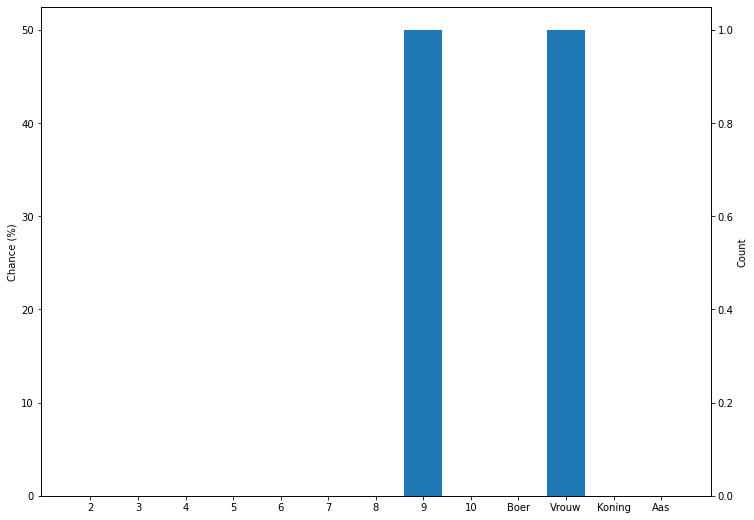

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

#card = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
card = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Boer', 'Vrouw', 'Koning', 'Aas']

def best1st(chance):
    centre = np.cumsum(chance)              # Making a cumulative list of the chances
    print(centre)
    best = (abs(centre - .5)).argmin()      # Finding the nearest value to 50%
    return card[best]

def best2nd(chance):
    higher

# A function that takes a count array, draws a (random) card and then 
# calculates the new chance for each card to be drawn.
def newchance(count):
    cards = np.sum(count)
    while True:
        picked = np.random.randint(0, len(count))
        if count[picked] == 0:
            continue
        else:
            count[picked] -= 1
            if np.sum(count) != 0:
                chance = count/np.sum(count)
                return chance, count
            else:
                chance = np.zeros(len(count))
                return chance, count
            
# A function that simulates a game. Plug in a starting list for the counts 
# of each card and then choose the number of iterations (card draws). The 
# result is the new chance after n number of card draws.
def simulation(count, iterations):
    cards = np.sum(count)
    if iterations == 0:
        return count/cards, count, cards
    else:
        while iterations > 0:
            if np.sum(count) != 0:
                chance, count = newchance(count)
                iterations -= 1
                continue
        return chance, count

    
    
count = np.array([4 for _ in range(13)])
nchance, ncount = simulation(count, 50)
print(best1st(nchance))


#print(newchance(count, cards))

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.bar(range(13), nchance*100)
ax.set_ylabel('Chance (%)')
ax2 = ax.twinx()
ax2.bar(range(13), ncount)
ax2.set_ylabel('Count')
plt.xticks(range(13), card, rotation=30)
plt.show()

In [358]:
import random

def rank2int(rank):
    try: 
        converter = {'Ace': 1, 'Jack' : 11, 'Queen' : 12, 'King' : 13}
        return converter[rank]
    except:
        return int(rank)

class Card:
    def __init__(self, rank, color):
        self.rank = rank
        self.color = color

        # also add a numerical value as rank
        #rank2int(self.rank)

        self.numrank = rank2int(self.rank)

class Deck:
    # Create two class variables that can be called upon with self.ranks and self.colors
    ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    colors = ['Diamond', 'Club', 'Heart', 'Spade']

    def __init__(self):
        
        # create a list of all possible unique Card objects (52 total)
        deck_list = []
        for rank in self.ranks:
            for color in self.colors:
                deck_list.append(Card(rank, color))

        self.deck_list = deck_list

    # remove a specific card from the deck
    def remove(self, rank, color):
        print('REMOVE CHECK')
        for i, card in enumerate(self.deck_list):
            if card.rank == rank and card.color == color:
                self.deck_list.pop(i)
                break
    
    # pick a random card from the deck
    def random_pick(self):
        random_card = random.choice(self.deck_list)
        return random_card
        
    # counts how much of each rank is left in deck
    def counts(self):
        
        # create empty dict with all ranks
        count_dict = dict(zip(self.ranks, [0]*len(self.ranks)))
        
        # count instances of that rank still in deck
        for card in self.deck_list:
            count_dict[card.rank] += 1
        
        return count_dict
    
    def total(self):
        tot = sum(self.counts().values())
        return tot
    
class Game:
    def __init__(self):
        print('init')
        self.cards = Deck()

    
    def new_round(self):
        """
        Initiates a new round of the game in which a random card
        is drawn from the deck, the user is asked for a rank and 
        either one or two rounds are played depending on the user guess.
        """
        
        picked = self.cards.random_pick()
        #first_guess = input('Please make a guess of the card rank')
        first_guess = random.randint(2, 10)
        
        # 1st round
        if first_guess == picked.rank:
            print('Dat was hem!')
            
            self.cards.remove(picked.rank, picked.color)
            beer = 0
            
        else:
            # 2nd round
            if rank2int(first_guess) > picked.numrank:
                #print('Your guess was too high')
                
                # update graph -> grey out all bars and including pick
                # if hints enabled, grey out the buttons too
                
                #second_guess = input('Please make another guess')
                second_guess = random.randint(2, 10)
                
                if second_guess == picked.rank:
                    print('Dat was hem!')

                    self.cards.remove(picked.rank, picked.color)
                    beer = 0
                
                else:
                    print(f'Helaas! Je kaart was  {picked.rank} of {picked.color}')
                    
                    self.cards.remove(picked.rank, picked.color)
                    beer = 1
                
                
            elif rank2int(first_guess) < picked.numrank:
                print('Your guess was too low')
                
                # update graph -> grey out all bars and including pick
                # if hints enabled, grey out the buttons too
                
                #second_guess = input('Please make another guess')
                second_guess = random.randint(2, 10)
                
                if second_guess == picked.rank:
                    print('Dat was hem!')

                    self.cards.remove(picked.rank, picked.color)
                    beer = 0
                
                else:
                    print(f'Helaas! Je kaart was  {picked.rank} of {picked.color}')
            
                    self.cards.remove(picked.rank, picked.color)
                    beer = 1
        
    def plot_counts(self):
        """
        Makes a barplot of the number of counts of each rank
        """
        return

In [360]:
i = 20
i[0]

TypeError: 'int' object is not subscriptable

In [350]:
game = Game()

for i in range(3):
    game.new_round()

init
REMOVE CHECK
REMOVE CHECK
REMOVE CHECK


In [318]:
D = Deck()

for i in range(2,5):
    D.remove(str(i), 'Club')
    print(len(D.deck_list))
    
#D.deck_list = D.remove('Ace', 2)
print(D.remove('Ace', ''))
print(len(D.deck_list))

REMOVE CHECK
51
REMOVE CHECK
50
REMOVE CHECK
49
REMOVE CHECK
None
49


In [254]:
game = Game()

game.__dict__

{'_cards': <__main__.Deck at 0x1cbe6258100>}

In [255]:
game.cards.remove('2', 'Diamond')
game.cards.counts()


CHECK


{'Ace': 4,
 '2': 3,
 '3': 4,
 '4': 4,
 '5': 4,
 '6': 4,
 '7': 4,
 '8': 4,
 '9': 4,
 '10': 4,
 'Jack': 4,
 'Queen': 4,
 'King': 4}